##### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data gathering

In [11]:
files = [file for file in os.listdir("./All_jobs")]
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./All_jobs/"+file)
    all_data = pd.concat([all_data, df])

all_data.to_csv("overall_jobs.csv", index=False)

### Data cleaning and preprocessing

In [13]:
all_job = pd.read_csv("overall_jobs.csv")
all_job.head()

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type
0,Chief Marketing Officer (CMO),National Debt Relief,NY,New York,-1,-1,Who We're Looking For:\n\nThe Chief Marketing ...,Finance,4.0,2020-05-08,2020-06-07,FULL_TIME
1,Registered Nurse,Queens Boulevard Endoscopy Center,NY,Rego Park,-1,-1,"Queens Boulevard Endoscopy Center, an endoscop...",NaN,3.0,2020-04-25,2020-06-07,FULL_TIME
2,Dental Hygienist,Batista Dental,NJ,West New York,-1,-1,Part-time or Full-timedental hygienist positio...,NaN,NaN,2020-05-02,2020-06-07,PART_TIME
3,Senior Salesforce Developer,National Debt Relief,NY,New York,44587,82162,Principle Duties & Responsibilities:\n\nAnalyz...,Finance,4.0,2020-05-08,2020-06-07,FULL_TIME
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,NY,New York,125410,212901,"For FULL Job Announcement, visit our website: ...",NaN,NaN,2020-04-28,2020-06-07,FULL_TIME


In [14]:
# Removing all the rows with Max Salary = -1
all_job = all_job[all_job['Max_Salary']!=-1]
# Converting date columns as date type
all_job['Date_Posted'] = pd.to_datetime(all_job['Date_Posted'])
all_job['Valid_until'] = pd.to_datetime(all_job['Valid_until'])

In [15]:
# Droping Industry, Job_Desc column and converting NAN values as 0 in Rating column
all_job.drop(['Industry', 'Job_Desc'], axis=1, inplace=True)
all_job['Rating'].fillna(0, inplace=True)

In [16]:
all_job['State'].unique()

array(['NY', 'NJ', 'CA', 'KY', 'TX', 'TN', 'VA', 'MD', 'DC', 'NC'],
      dtype=object)

In [17]:
# Replace State columns with full names
all_job['State'].unique()
abb = {'NY' : 'New York', 'NJ' : 'New Jersey', 'CA' : 'California', 'KY' : 'Kentucky', 'TX' : 'Texas', 'TN' : 'Tennessee', 
       'VA' : 'Virginia', 'MD' : 'Maryland', 'DC' : 'District of Columbia', 'NC' : 'North Carolina'}
all_job['State'] = all_job['State'].apply(lambda x: abb[x])


In [18]:
# Cleaned Dataframe
all_job.head()

,Job_title,Company,State,City,Min_Salary,Max_Salary,Rating,Date_Posted,Valid_until,Job_Type
3,Senior Salesforce Developer,National Debt Relief,New York,New York,44587,82162,4.0,2020-05-08,2020-06-07,FULL_TIME
4,"DEPUTY EXECUTIVE DIRECTOR, PROGRAM AND LEGAL A...",National Advocates for Pregnant Women,New York,New York,125410,212901,0.0,2020-04-28,2020-06-07,FULL_TIME
5,Emergency Veterinarian - NYC,Veterinary Emergency Group,New York,New York,94715,103279,4.9,2020-05-05,2020-06-07,FULL_TIME
6,ABA Therapist,Kids Learning Loft Applied Behavior Analysis S...,New York,Williston Park,20000,35000,0.0,2020-05-07,2020-06-07,PART_TIME
7,Construction Project Manager,The LiRo Group,New York,Brooklyn,54991,143860,3.8,2020-05-08,2020-06-07,FULL_TIME


##### Segregating Data related jobs and other jobs 

In [19]:
# Extracting Data Jobs and other jobs
data_job = all_job[all_job['Job_title'].str.contains('Data')]
ind=all_job[all_job['Job_title'].str.contains('Data')].index
other_job = all_job.drop(ind)
data_job.to_csv("Data_jobs.csv", index=False)

In [2]:
df = pd.read_csv("Data_jobs.csv")
df

,Job_title,Company,State,City,Min_Salary,Max_Salary,Rating,Date_Posted,Valid_until,Job_Type
0,Senior Data Scientist - Underwriting Algorithms,Faire,California,San Francisco,151875,170407,4.3,2020-05-06,2020-06-05,FULL_TIME
1,Data Scientist,GovTech,California,San Francisco,78594,147225,3.6,2020-05-01,2020-06-05,FULL_TIME
2,Data Scientist,Triplebyte,California,San Francisco,145000,225000,3.6,2020-04-28,2020-06-05,FULL_TIME
3,Data Scientist,Notion Labs,California,San Francisco,105765,142959,5.0,2020-05-04,2020-06-05,FULL_TIME
4,Data Scientist,Seen by Indeed,California,San Francisco,110377,143329,0.0,2020-04-25,2020-06-05,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...
1127,Data Engineer/Architect with Security Clearance,Booz Allen Hamilton,Virginia,McLean,74916,128610,3.7,2020-04-24,2020-06-06,FULL_TIME
1128,Data Engineer with Security Clearance,Booz Allen Hamilton,Virginia,Arlington,58824,112227,3.7,2020-05-02,2020-06-06,FULL_TIME
1129,"Data Engineer, Mid with Security Clearance",Booz Allen Hamilton,Virginia,Herndon,58824,112227,3.7,2020-05-07,2020-06-06,FULL_TIME
1130,"Data Modeler, Senior with Security Clearance",Booz Allen Hamilton,Virginia,Springfield,90454,151998,3.7,2020-04-28,2020-06-06,FULL_TIME


### Data analysis & Visualization

##### Most popular data jobs (Top 5)

In [5]:
df['count'] = 1
df_sorted = df.sort_values('Date_Posted')
df_sum = df_sorted.groupby('Job_title').sum().reset_index()
df_sum.sort_values('count', ascending=False, inplace = True)
top5 = df_sum.head()
top5


,Job_title,Min_Salary,Max_Salary,Rating,count
223,Data Scientist,11913597,17220916,484.9,136
123,Data Engineer,7863693,10639645,344.6,94
82,Data Analyst,2584387,4198434,148.8,46
552,Senior Data Scientist,3558809,4901473,112.6,30
537,Senior Data Engineer,3303844,4217836,111.1,29


##### Plotting in bar graph

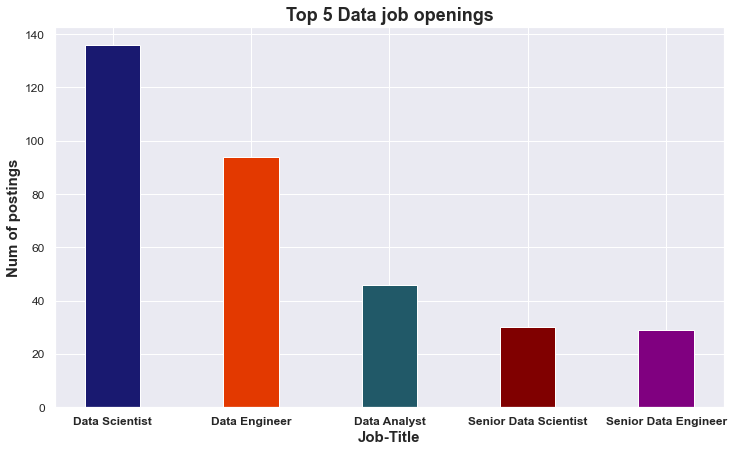

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(12,7))
plt.bar(top5['Job_title'], top5['count'], width=0.4, color=['midnightblue', '#e33900', '#215968', 'maroon', 'purple'])
plt.title("Top 5 Data job openings", fontsize = 18, weight="bold")
plt.xticks(fontsize = 12, weight = 'bold')
plt.yticks(fontsize = 12)
plt.xlabel("Job-Title", fontsize = 15, weight="bold")
plt.ylabel("Num of postings", fontsize = 15, weight="bold")
plt.show()

##### Data jobs count - state wise

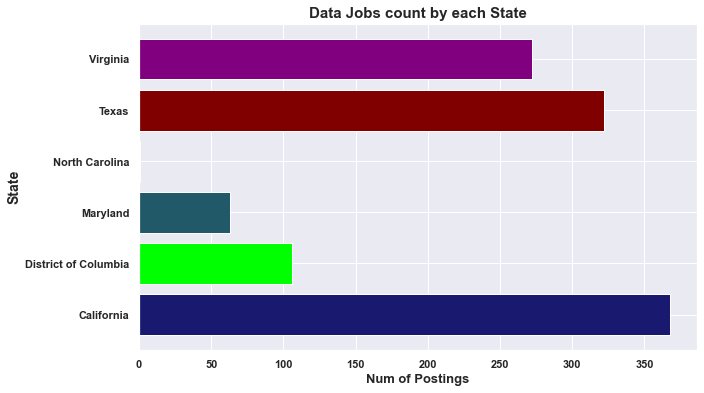

In [7]:
state_count = df_sorted.groupby('State').sum().reset_index()
plt.figure(figsize=(10,6))
plt.barh(state_count['State'], state_count['count'], color = ['midnightblue', 'lime', '#215968','black', 'maroon', 'purple'])
plt.title("Data Jobs count by each State", fontsize = 15, weight = 'bold')
plt.xlabel("Num of Postings", fontsize = 13, weight='bold')
plt.ylabel("State", fontsize = 14, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

##### Line graph to show job openings by Date Posted

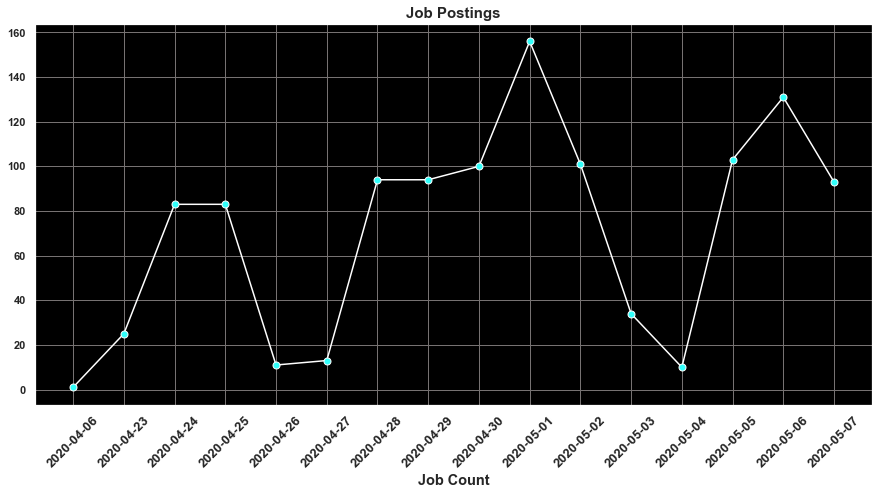

In [115]:
temp = df_sorted.groupby('Date_Posted').sum().reset_index()
sns.set(rc = {'axes.facecolor':'black', 'figure.facecolor':'white', 'grid.color' : '#767272'})
plt.figure(figsize=(15,7))
plt.title("Job Postings", fontsize = 15, weight = 'bold')
plt.xlabel("Date Posted", fontsize = 13, weight = 'bold')
plt.ylabel("Job Count", fontsize = 14.5, weight = 'bold')
plt.plot(temp['Date_Posted'], temp['count'], color = 'white', linestyle = 'solid', marker = 'o',
         markerfacecolor = '#31fffb', markersize = 7)
plt.xticks(fontsize = 13, rotation = 45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()


##### Area graph to compare Top 4 data jobs with date posted

In [5]:
top4 = top5.head(4)
top4 = top4['Job_title'].to_list()
top4

['Data Scientist', 'Data Engineer', 'Data Analyst', 'Senior Data Scientist']

In [11]:
top4_df = df_sorted[df_sorted['Job_title'].isin(top4) == True]
top4_df

,Job_title,Company,State,City,Min_Salary,Max_Salary,Rating,Date_Posted,Valid_until,Job_Type,count
35,Data Scientist,Nomis Solutions,California,Brisbane,118964,187172,3.8,2020-04-23,2020-06-05,FULL_TIME,1
37,Data Scientist,Eaze,California,San Francisco,89300,144413,3.6,2020-04-23,2020-06-05,FULL_TIME,1
38,Data Analyst,Duetto,California,San Francisco,61655,115933,4.4,2020-04-23,2020-06-05,FULL_TIME,1
168,Data Engineer,BlueVoyant,California,San Francisco,100959,124595,4.2,2020-04-23,2020-06-05,FULL_TIME,1
21,Data Engineer,Rocket Lawyer,California,San Francisco,116784,118008,3.5,2020-04-23,2020-06-05,FULL_TIME,1
...,...,...,...,...,...,...,...,...,...,...,...
720,Data Scientist,Koch Industries,Virginia,Arlington,103270,133441,3.6,2020-05-07,2020-06-06,FULL_TIME,1
519,Data Engineer,Intersys,Texas,Austin,77228,103289,0.0,2020-05-07,2020-06-06,FULL_TIME,1
496,Data Analyst,Texas Health and Human Services Commission,Texas,Austin,56743,69498,2.7,2020-05-07,2020-06-06,PART_TIME,1
492,Data Engineer,Tek Leaders,Texas,Plano,73521,118121,3.5,2020-05-07,2020-06-06,FULL_TIME,1


In [107]:
grouped = top4_df.groupby(['Job_title', 'Date_Posted'])['count'].sum().reset_index()
DA = grouped[grouped['Job_title'] == 'Data Analyst']
DA = DA[['Date_Posted', 'count']]
DA.rename(columns={'count':'Data Analyst'}, inplace=True)
DA
DE = grouped[grouped['Job_title'] == 'Data Engineer']
DE = DE[['Date_Posted', 'count']]
DE.rename(columns={'count':'Data Engineer'}, inplace=True)
DE
DS = grouped[grouped['Job_title'] == 'Data Scientist']
DS = DS[['Date_Posted', 'count']]
DS.rename(columns={'count':'Data Scientist'}, inplace=True)
DS
SDS = grouped[grouped['Job_title'] == 'Senior Data Scientist']
SDS = SDS[['Date_Posted', 'count']]
SDS.rename(columns={'count':'Senior Data Scientist'}, inplace=True)
SDS

#merging all 4 dfs to one.
from functools import reduce
dfs = [DA, DE, DS, SDS]
merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Date_Posted'], how='outer'), dfs)
merged_df.fillna(0, inplace=True)
merged_df

,Date_Posted,Data Analyst,Data Engineer,Data Scientist,Senior Data Scientist
0,2020-04-23,1.0,2,2.0,0.0
1,2020-04-24,3.0,6,9.0,0.0
2,2020-04-25,6.0,5,14.0,1.0
3,2020-04-27,2.0,1,1.0,0.0
4,2020-04-28,5.0,5,9.0,3.0
5,2020-04-29,7.0,7,10.0,1.0
6,2020-04-30,3.0,8,11.0,4.0
7,2020-05-01,1.0,16,23.0,4.0
8,2020-05-02,2.0,10,12.0,2.0
9,2020-05-05,9.0,12,11.0,1.0


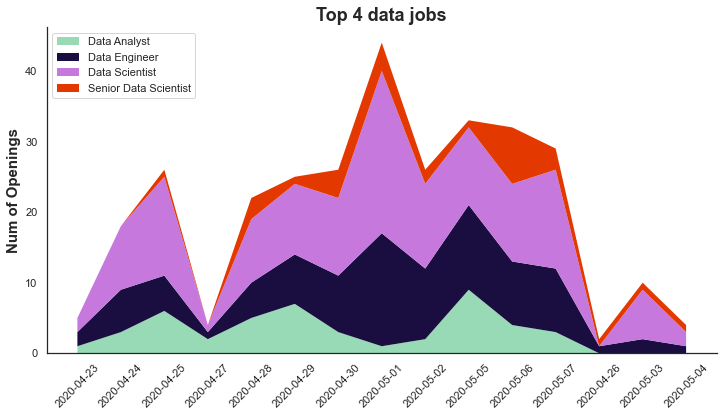

In [111]:
sns.set_style(style="white")
colors =['#98d9b6','#1a0e41', '#c678dd', '#e33900']
leged = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Senior Data Scientist']
plt.figure(figsize=(12,6))
plt.stackplot(merged_df['Date_Posted'],
             merged_df['Data Analyst'],
             merged_df['Data Engineer'],
             merged_df['Data Scientist'],
             merged_df['Senior Data Scientist'],
             colors=colors,
             edgecolor = 'none'
             )

plt.xticks(merged_df['Date_Posted'], rotation=45)
plt.ylabel("Num of Openings", fontsize=15, weight='bold')
plt.title("Top 4 data jobs", fontsize=18, weight='bold')
plt.legend(labels= leged, loc ='upper left')
sns.despine()
plt.show()


##### Job types as pie chart

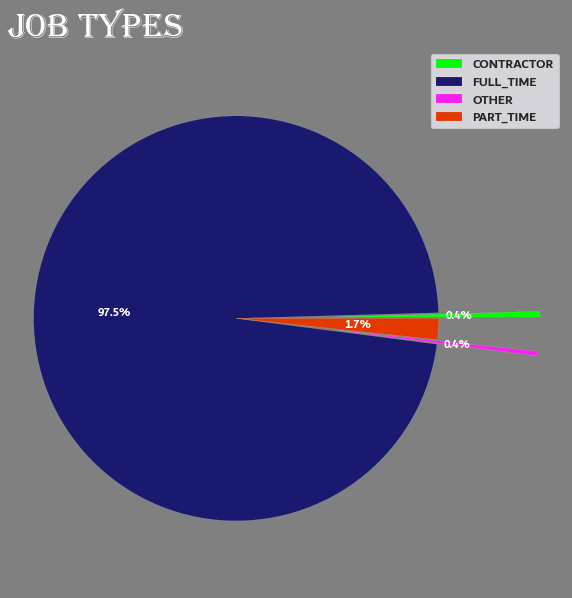

In [49]:
t = df_sorted.groupby('Job_Type').sum().reset_index()
exp = [0.5,0,0.5,0]
sns.set(rc = {'figure.facecolor':'grey', 'font.family':'Dubai', 'font.weight':'bold'})
#plt.rcParams['font.weight'] = 'bold'
plt.figure(figsize=(10,10))
plt.pie(t['count'],explode=exp, colors = ['lime', 'midnightblue', '#f720ee','#e33900'], autopct='%1.1f%%'
       , wedgeprops={'linewidth': 0.1}, textprops={'color':'white', 'size': 12})
plt.axis('equal')
plt.title("JOB TYPES", fontsize = 35, fontfamily = 'Algerian', color = 'w', weight='bold', loc = 'left', pad = 10.0)
plt.legend(t['Job_Type'], loc="best", fontsize=13)
plt.show()
